<a href="https://colab.research.google.com/github/meurii/ProjetoK_means/blob/main/PROJETO_UNIDADE_10_Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# vamo começar importando as bibli

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# vamo definir o link para o dataset

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00240/UCI%20HAR%20Dataset.zip"

In [ ]:
# agora a gente faz o download e extração do dataset
!wget -q $url -O har_dataset.zip
!unzip -o -q har_dataset.zip

In [ ]:
features_path_train = "UCI HAR Dataset/train/X_train.txt"  #-> aqi a gente mostra o caminho dos arquivos
labels_path_train = "UCI HAR Dataset/train/y_train.txt"
features_path_test = "UCI HAR Dataset/test/X_test.txt"
labels_path_test = "UCI HAR Dataset/test/y_test.txt"
features_names_path = "UCI HAR Dataset/features.txt"
activity_labels_path = "UCI HAR Dataset/activity_labels.txt"

features_train = pd.read_csv (features_path_train, sep = r"\s+", header = None)  #-> aqi a gente carrega features e activity_labels
activity_labels_train = pd.read_csv (labels_path_train, sep = r"\s+", header = None, names = ["activity_id"])
features_test = pd.read_csv (features_path_test, sep = r"\s+", header = None)
activity_labels_test = pd.read_csv (labels_path_test, sep = r"\s+", header = None, names = ["activity_id"])

In [ ]:
# pra visualizar os arquivos

print (features_train.shape)
print (features_train.head())

print (features_test.shape)
print (features_test.head())

(7352, 561)
        0         1         2         3         4         5         6    \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

        7         8         9    ...       551       552       553       554  \
0 -0.983185 -0.923527 -0.934724  ... -0.074323 -0.298676 -0.710304 -0.112754   
1 -0.974914 -0.957686 -0.943068  ...  0.158075 -0.595051 -0.861499  0.053477   
2 -0.963668 -0.977469 -0.938692  ...  0.414503 -0.390748 -0.760104 -0.118559   
3 -0.982750 -0.989302 -0.938692  ...  0.404573 -0.117290 -0.482845 -0.036788   
4 -0.979672 -0.990441 -0.942469  ...  0.087753 -0.351471 -0.699205  0.123320   

        555       556       557       558       559     

In [ ]:
# vamo nomear as colunas com nomes genéricos e usar uma lista separada pra relacioná-las depois (pra simplificar esse carregamento inicial dos dados)

with open (features_path_train) as f:
  n_cols = len (f.readline().split())  #-> vamo contar quantas colunas tem na primeira linha

generic_column_names = [f"coluna_{i+1}" for i in range (n_cols)]  #-> vamo gerar nomes genéricos pras colunas

features_train = pd.read_csv (features_path_train, sep = r"\s+", header = None, names = generic_column_names)  #-> vamo carregar os dados com os nomes genéricos
features_test = pd.read_csv (features_path_test, sep = r"\s+", header = None, names = generic_column_names)

print (features_train.columns[:10])

Index(['coluna_1', 'coluna_2', 'coluna_3', 'coluna_4', 'coluna_5', 'coluna_6',
       'coluna_7', 'coluna_8', 'coluna_9', 'coluna_10'],
      dtype='object')


In [ ]:
# vamo mapear os nomes genéricos pros originais

features_names = pd.read_csv (features_names_path, sep = r"\s+", header = None)
original_column_names = features_names[1].str.strip()

column_mapping = pd.DataFrame ({
    "nome_generico": generic_column_names,
    "nome_original": original_column_names
})
column_mapping.head()

,nome_generico,nome_original
0,coluna_1,tBodyAcc-mean()-X
1,coluna_2,tBodyAcc-mean()-Y
2,coluna_3,tBodyAcc-mean()-Z
3,coluna_4,tBodyAcc-std()-X
4,coluna_5,tBodyAcc-std()-Y


In [ ]:
print (features_train.shape)
print (features_train.head())

(7352, 561)
   coluna_1  coluna_2  coluna_3  coluna_4  coluna_5  coluna_6  coluna_7  \
0  0.288585 -0.020294 -0.132905 -0.995279 -0.983111 -0.913526 -0.995112   
1  0.278419 -0.016411 -0.123520 -0.998245 -0.975300 -0.960322 -0.998807   
2  0.279653 -0.019467 -0.113462 -0.995380 -0.967187 -0.978944 -0.996520   
3  0.279174 -0.026201 -0.123283 -0.996091 -0.983403 -0.990675 -0.997099   
4  0.276629 -0.016570 -0.115362 -0.998139 -0.980817 -0.990482 -0.998321   

   coluna_8  coluna_9  coluna_10  ...  coluna_552  coluna_553  coluna_554  \
0 -0.983185 -0.923527  -0.934724  ...   -0.074323   -0.298676   -0.710304   
1 -0.974914 -0.957686  -0.943068  ...    0.158075   -0.595051   -0.861499   
2 -0.963668 -0.977469  -0.938692  ...    0.414503   -0.390748   -0.760104   
3 -0.982750 -0.989302  -0.938692  ...    0.404573   -0.117290   -0.482845   
4 -0.979672 -0.990441  -0.942469  ...    0.087753   -0.351471   -0.699205   

   coluna_555  coluna_556  coluna_557  coluna_558  coluna_559  coluna_560 

In [ ]:
# vamo unificar os conjuntos de dados em um único DataFrame

features = np.vstack ([features_train, features_test])  #-> conjunto de features (X)
activity_labels = np.vstack ([activity_labels_train, activity_labels_test])

- lembrando que no k-means, geralmente, a gente trabalha apenas com as features, já que é um treinamento sem supervisão (sem saber os rótulos reais)
- vamo usar os rótulos só em uma validação posterior, depois de treinar o modelo, pra verificar se os clusters correspondem bem aos rótulos reais (oq ajuda a entender se o modelo captou os padrões de forma significativa)

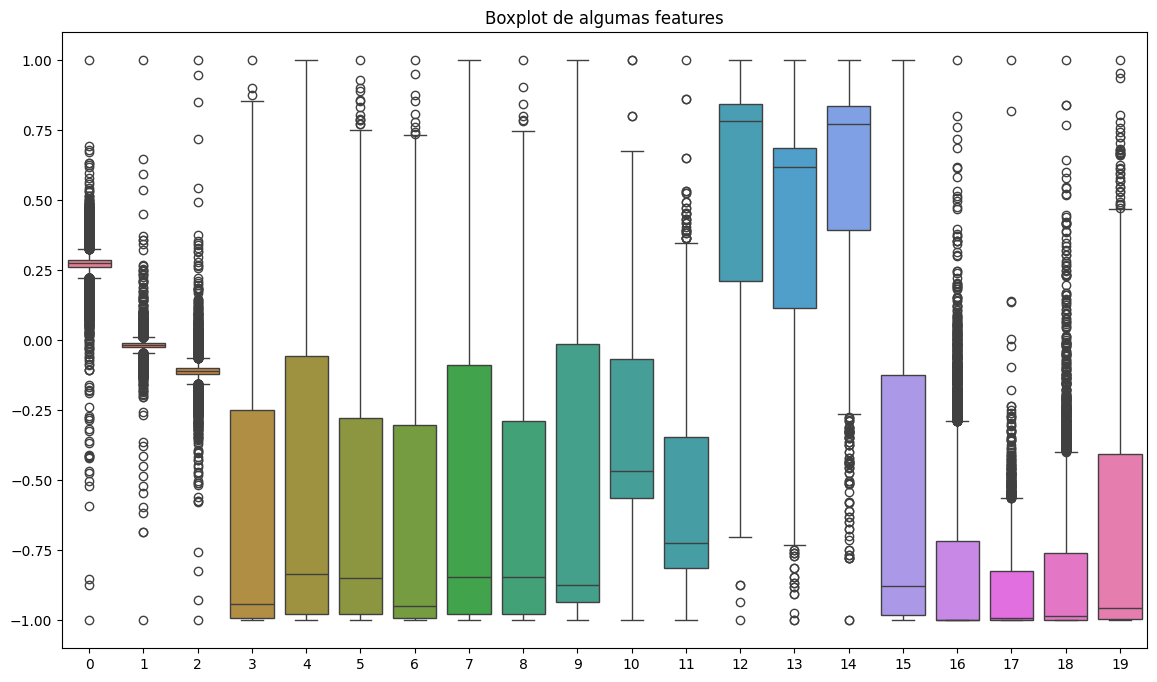

In [ ]:
# vamo analisar possíveis outliers com um boxplot:

plt.figure (figsize = (14, 8))
sns.boxplot (data = features [:, :20])  #-> aqi a gente selecionou as 10 primeiras features
plt.title ("Boxplot de algumas features")
plt.show()

- já dá pra gente ver que tem bastante outlier;
- vamo usar a windsorização pra limitar os valores extremos sem removê-los completamente

In [ ]:
# antes de seguir pra normalização dos dados, vamo dar uma tratada nos outliers

from scipy.stats.mstats import winsorize

features_win = features.copy()  #-> vamo criar uma cópia pra garantir
for i in range (features_win.shape[1]):
  features_win [:, i] = winsorize (features [:, i], limits = (0.08, 0.08))  #-> esses limits vão delimitar os valores nos extremos ao percentil 8 e 92%

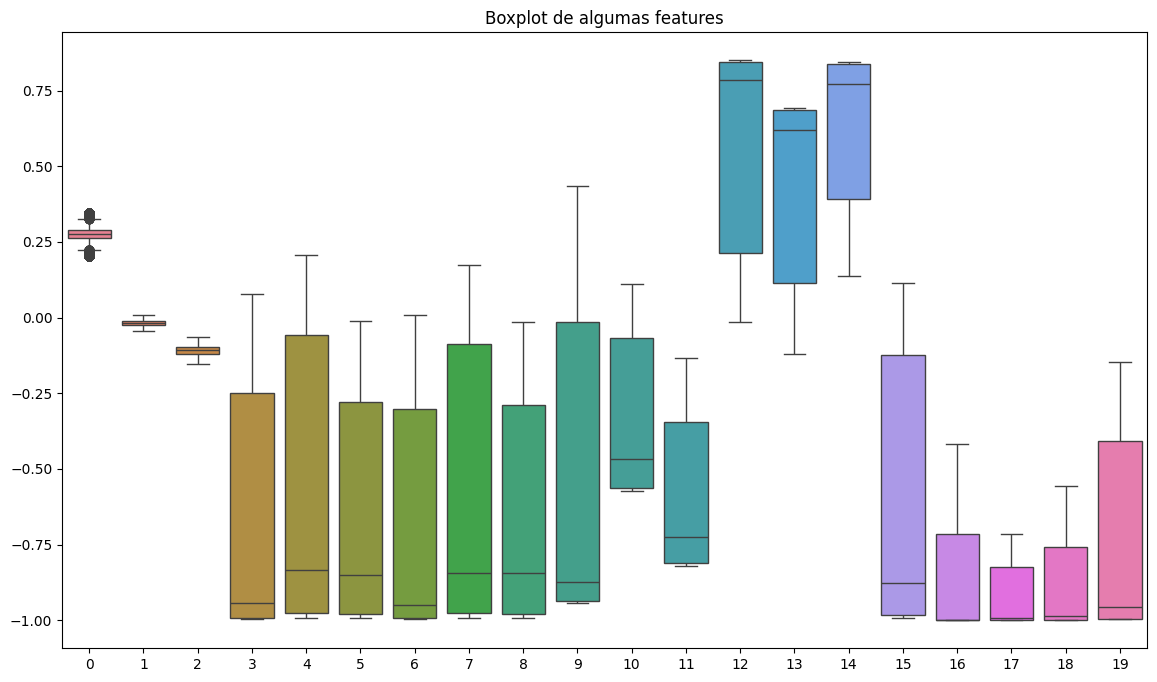

In [ ]:
# vamo analisar possíveis outliers com um boxplot:

plt.figure (figsize = (14, 8))
sns.boxplot (data = features_win [:, :20])  #-> aqi a gente selecionou as 20 primeiras features
plt.title ("Boxplot de algumas features")
plt.show()

- já deu uma melhorada nos outliers. vamo seguir assim, e depois tratar mais se for necessário.
- o k-means é bem sensível à escala, então vamo normalizar os dados pras colunas ficarem na mesma faixa de valores;
- vamo usar o RobustScaler pra normalizar esses dados com base na mediana e nos quartis, minimizando o impacto de valores extremos.

In [ ]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
features_scaled = scaler.fit_transform (features_win)  #-> aqi vamo normalizar

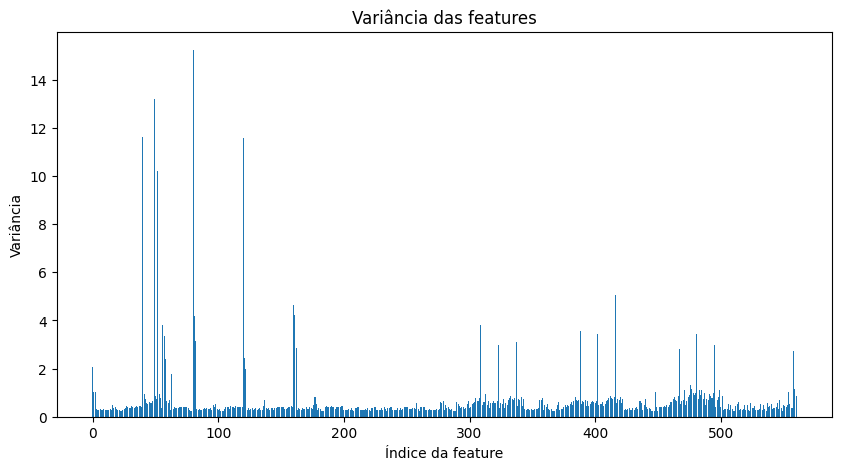

Features com variância baixa: []


In [ ]:
# seguindo com a exploração inicial dos dados, vamo verificar a variância das features

variances = np.var (features_scaled, axis = 0)  #-> aqi a gente calcula as variâncias
plt.figure (figsize = (10, 5))
plt.bar (range (len (variances)), variances)
plt.title ("Variância das features")
plt.xlabel ("Índice da feature")
plt.ylabel ("Variância")
plt.show()

baixa_variancia = np.where (variances < 0.01)[0]  #-> aqi a gente identifica as features com variância baixa
print (f"Features com variância baixa: {baixa_variancia}")

- o gráfico mostra uma variedade de valores de variância;
- a info abaixo do gráfico diz que nenhuma variável foi identificadas com variância baixa;
- variáveis com variância muito baixa,geralmente não contribuem significativamente pra formação dos clusters, podendo até introduzir ruído no modelo; mas no nosso caso, não vamo precisar remover nenhuma.
- a gente pode combinar mais algumas estratégias pra selecionar as variáveis mais relevantes e reduzir a redundância no conjunto de dados:
- vamo calcular o VIF pra identificar relações lineares entre múltiplas variáveis (que é a multicolinearidade).
- e antes disso, vamo dar uma olhada nas correlações.

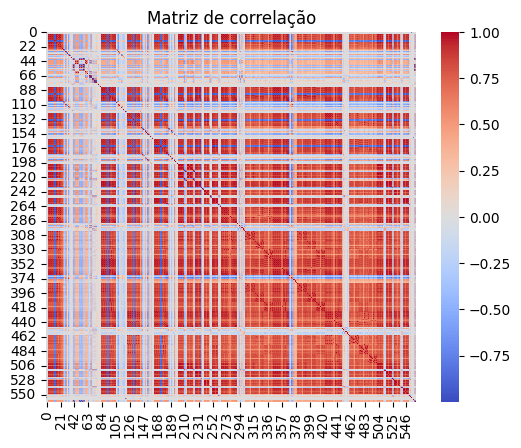

In [ ]:
# vamo só dar uma analisada nas correlações

matriz_correlacao = np.corrcoef (features_scaled.T)
sns.heatmap (matriz_correlacao, cmap = 'coolwarm', square = True)
plt.title ("Matriz de correlação")
plt.show()

- dá pra ter uma noção de que algumas variáveis tão bem correlacionadas.
- mas como nosso objetivo depois de analisar as variáveis relevantes é reduzir a dimensionalidade, as altas correlações não são necessariamente um problema, já que esses métodos de redução reduzem redundâncias automaticamente.
- vamo seguindo com todas as variáveis novamente.

In [ ]:
# depois disso, a gente pode identificar multicolinearidade com base no VIF
# como é um banco de dados com muitas variáveis, calcular o VIF com o 'variance_inflation_factor' pode não ser eficiente
# então vamo usar matrizes

features_win_df = pd.DataFrame (features_win)
features_scaled_df = pd.DataFrame (features_scaled, columns = features_win_df.columns)

def calcular_vif (data):  #-> aqi a gente faz a função pra calcular o VIF
  from numpy.linalg import inv
  if isinstance (data, pd.DataFrame):
    X = data.values
    colunas = data.columns
  elif isinstance (data, np.ndarray):
    X = data
    colunas = [f"{i}" for i in range (X.shape [1])]
  else:
    raise ValueError ("o tipo de dado deve ser pandas ou numpy")
  X = np.asarray (X, dtype = np.float64)
  matriz_corr = np.corrcoef (X, rowvar = False)  #-> aqi a gente calcula a matriz de correlação
  inverso_matriz_corr = inv (matriz_corr)  #-> e depois calcula a sua inversa
  vif = np.diag (inverso_matriz_corr)
  return pd.DataFrame ({"Variável": colunas, "VIF": vif})

vif_df = calcular_vif (features_scaled_df)  #-> aqi a gente calcula o VIF
vif_limite = 8  #-> aqi a gente define o limite pra VIF alto
features_vif_alto = vif_df [vif_df ["VIF"] > vif_limite] ["Variável"].tolist()

features_filtrada_vif = features_scaled_df.drop (columns = features_vif_alto)
print (f"Variáveis removidas por VIF alto: {features_vif_alto}")

Variáveis removidas por VIF alto: [3, 4, 5, 7, 9, 12, 13, 16, 17, 18, 19, 20, 22, 26, 28, 29, 30, 31, 33, 34, 35, 37, 39, 40, 44, 47, 49, 53, 55, 56, 57, 58, 60, 61, 62, 65, 69, 71, 73, 75, 83, 84, 89, 92, 93, 95, 97, 98, 100, 101, 103, 104, 105, 107, 109, 110, 111, 112, 114, 118, 120, 121, 126, 127, 128, 129, 130, 132, 133, 134, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 154, 155, 156, 158, 165, 166, 168, 169, 170, 174, 176, 178, 182, 184, 185, 190, 191, 193, 194, 200, 201, 204, 205, 207, 210, 212, 214, 217, 218, 222, 226, 227, 228, 229, 230, 231, 232, 233, 234, 238, 239, 241, 242, 243, 244, 245, 246, 249, 250, 251, 252, 253, 254, 255, 256, 257, 259, 262, 263, 264, 265, 268, 269, 271, 272, 273, 275, 276, 278, 279, 281, 284, 285, 286, 289, 293, 295, 296, 297, 298, 299, 300, 302, 303, 304, 305, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 325, 327, 328, 329, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 343, 344

In [ ]:
# vamo recalcular o VIF só pra garantir que novas variáveis não tenham surgido com valores elevados

def recalcular_vif_ate_necessario (data, limite_vif = 8):  #-> essa função vai recalcular o VIF até que todas as variáveis apresentem VIF menor que 5
  while True:
    vif_df = calcular_vif (data)  #-> aqi calcula o VIF
    vif_alto = vif_df [vif_df ["VIF"] > limite_vif]
    if vif_alto.empty:  #-> se não tiver mais nenhuma variável com VIF maior que 5, ele vai parar
      break
    variaveis_vif_alto = vif_alto ["Variável"].tolist()
    data = data.drop (columns = variaveis_vif_alto)  #-> aqi ele remove as variáveis com VIF alto
    print (f"Variáveis removidas por VIF alto: {variaveis_vif_alto}")
  return data

features_filtrada_final = recalcular_vif_ate_necessario (features_scaled_df, limite_vif = 5)  #-> aqi aplica a função pra recalcular até qnd não for mais necessário
print (f"Número final de variáveis: {features_filtrada_final.shape [1]}")

Variáveis removidas por VIF alto: [3, 4, 5, 7, 9, 12, 13, 16, 17, 18, 19, 20, 22, 26, 28, 29, 30, 31, 33, 34, 35, 37, 39, 40, 44, 47, 49, 53, 55, 56, 57, 58, 60, 61, 62, 64, 65, 69, 71, 73, 75, 83, 84, 89, 92, 93, 95, 97, 98, 100, 101, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 114, 118, 120, 121, 126, 127, 128, 129, 130, 132, 133, 134, 137, 138, 139, 140, 141, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 154, 155, 156, 158, 165, 166, 168, 169, 170, 174, 176, 178, 182, 184, 185, 190, 191, 193, 194, 196, 199, 200, 201, 204, 205, 207, 210, 212, 214, 217, 218, 222, 226, 227, 228, 229, 230, 231, 232, 233, 234, 238, 239, 241, 242, 243, 244, 245, 246, 249, 250, 251, 252, 253, 254, 255, 256, 257, 259, 261, 262, 263, 264, 265, 268, 269, 271, 272, 273, 275, 276, 277, 278, 279, 281, 284, 285, 286, 289, 293, 294, 295, 296, 297, 298, 299, 300, 302, 303, 304, 305, 308, 309, 310, 311, 312, 313, 314, 315, 316, 317, 318, 319, 320, 321, 322, 323, 325, 327, 328, 329, 331, 332, 333, 334, 335,

Variância Explicada: [0.23467472 0.09147671]
Variância acumulada: 0.32615143163049654


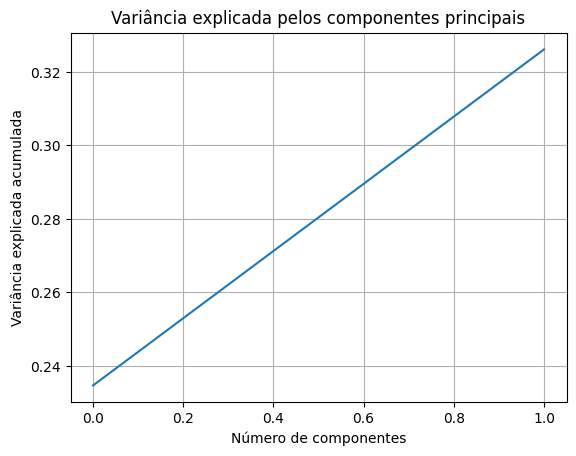

In [ ]:
# depois de filtrar as variáveis, vamo reduzir a dimensionalidade com PCA

from sklearn.decomposition import PCA

pca = PCA (n_components = 2)  #-> aqi vamo reduzir as dimensões pra 2
features_pca = pca.fit_transform (features_filtrada_final)

# vamo calcular tbm a variância pra cada componente:

var_explicada = pca.explained_variance_ratio_
print (f"Variância Explicada: {var_explicada}")
print (f"Variância acumulada: {var_explicada.sum()}")

plt.plot (np.cumsum (var_explicada))
plt.xlabel ("Número de componentes")
plt.ylabel ("Variância explicada acumulada")
plt.title ("Variância explicada pelos componentes principais")
plt.grid (True)
plt.show()

- uma variância menor do que 50% pode ser problemático pq indica que a maioria das informações nos dados originais foi descartada;
- a variância explicada pelos dois componentes principais ficou mais baixa do que seria considerado bom, mas vamo seguir e analisar o impacto disso.


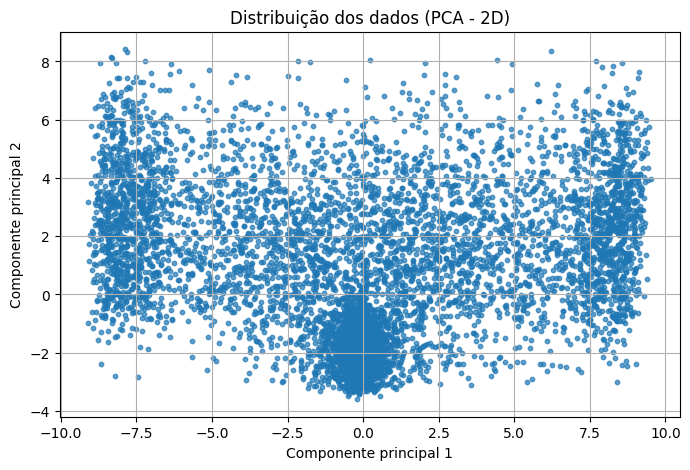

In [ ]:
# vamo fazer um gráfico de dispersão pra visualizar a distribuição geral dos dados:

plt.figure (figsize = (8, 5))
plt.scatter (features_pca [:, 0], features_pca [:, 1], s = 10, alpha = 0.7)
plt.title ("Distribuição dos dados (PCA - 2D)")
plt.xlabel ("Componente principal 1")
plt.ylabel ("Componente principal 2")
plt.grid (True)
plt.show()

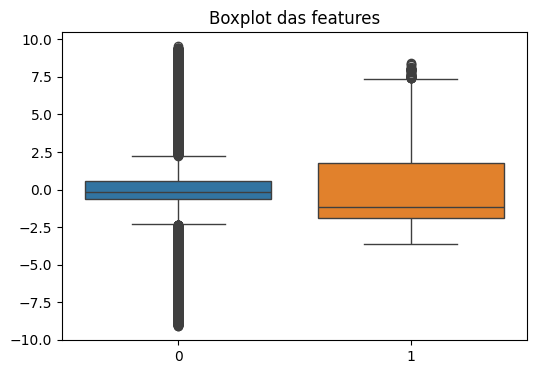

In [ ]:
# vamo confirmar se o tratamento dos outliers tá suficiente pra esses componentes:

plt.figure (figsize = (6, 4))
sns.boxplot (data = features_pca)
plt.title ("Boxplot das features")
plt.show()

In [ ]:
# como um componente apresenta um número maior de outlier do que outro, vamo tratar de forma individual

pc1_win = winsorize (features_pca [:, 0], limits = (0.18, 0.19))
features_pca [:, 0] = pc1_win

pc2_win = winsorize (features_pca [:, 1], limits = (0.0001, 0.05))
features_pca [:, 1] = pc2_win

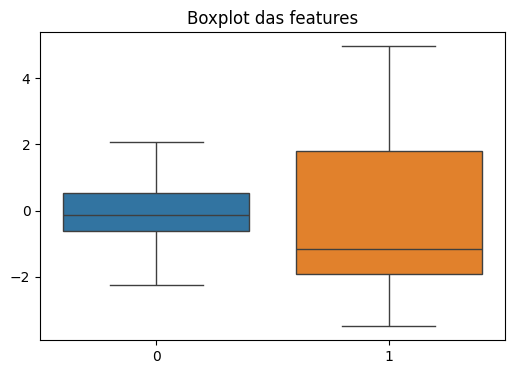

In [ ]:
# vamo gerar os boxplots de novo pra visualizar o impacto do winsorize:

plt.figure (figsize = (6, 4))
sns.boxplot (data = features_pca)
plt.title ("Boxplot das features")
plt.show()

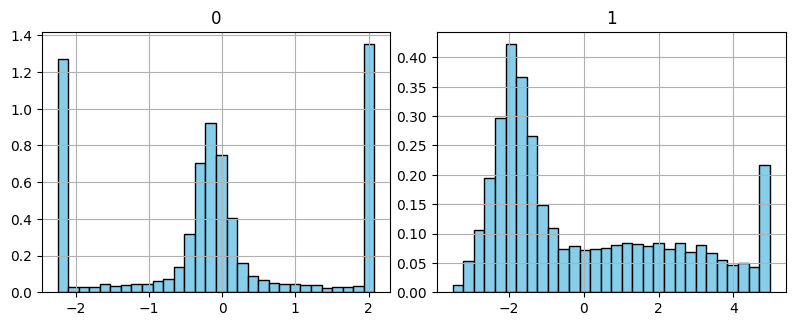

In [ ]:
# vamo gerar histogramas tbm, pra analisar a distribuição de cada variável

features_pca_df = pd.DataFrame (features_pca)
features_pca_df.hist (bins = 30, density = True, figsize = (20, 45), layout = (15, 5), color = 'skyblue', edgecolor = 'black')  #-> aqi cria o histograma
plt.title ("Distribuição das variáveis")
plt.tight_layout()
plt.show()

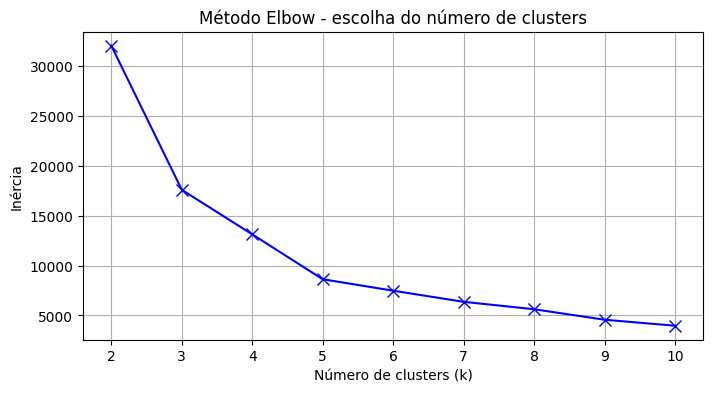

In [ ]:
# antes de treinar o modelo, vamo escolher o número de clusters
# vamo usar o método Elbow pra achar o cotovelo

from sklearn.cluster import KMeans

inertia = []
K = range (2, 11)  #-> vamo testar de 2 a 10 clusters

for k in K:
  kmeans = KMeans (n_clusters = k, random_state = 42)
  kmeans.fit(features_pca)
  inertia.append (kmeans.inertia_)

plt.show()

# gráfico da inércia - Elbow
plt.figure (figsize = (8, 4))
plt.plot (K, inertia, 'bx-', markersize = 8)
plt.title ("Método Elbow - escolha do número de clusters")
plt.xlabel ("Número de clusters (k)")
plt.ylabel ("Inércia")
plt.grid (True)
plt.show()

- o cotovelo parece ser em 5, mas não é completamente visível.
- matemáticamente, o ponto que indica o equilíbrio entre maior homogeneidade dentro do cluster e a maior diferença entre clusters, é o ponto da curva mais distante de uma reta traçada entre o primeiro e o último ponto, então vamo tentar dessa forma, pra ajudar a definir o k ideal.

In [ ]:
# vamo ver, matematicamente, qual o número ideal de clusters pelo método Elbow

from math import sqrt
wcss = []  #-> o parâmetro wcss representa a lista de inércias
K = range (2, 11)
for k in K:
  kmeans = KMeans (n_clusters = k, random_state = 42)
  kmeans.fit (features_pca)
  wcss.append (kmeans.inertia_)

def melhor_n_cluster (wcss):
    x1, y1 = 2, wcss[0]  #-> aqi a gente define os pontos iniciais e finais, indo de clusters com 2 grupos, até clusters com 20 grupos
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []  #-> as distâncias vão ser armazenadas aqi, e o índice de maior valor corresponde ao ponto de cotovelo
    for i in range(len(wcss)):
        x0 = i+2  #-> a gente ajusta esse índice em +2 pra refletir que os valores começam em 2 e não em 0
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)

    return distances.index(max(distances)) + 2

melhor_k = melhor_n_cluster (wcss)
print (f"O número ideal de clusters é: {melhor_k}")

O número ideal de clusters é: 5


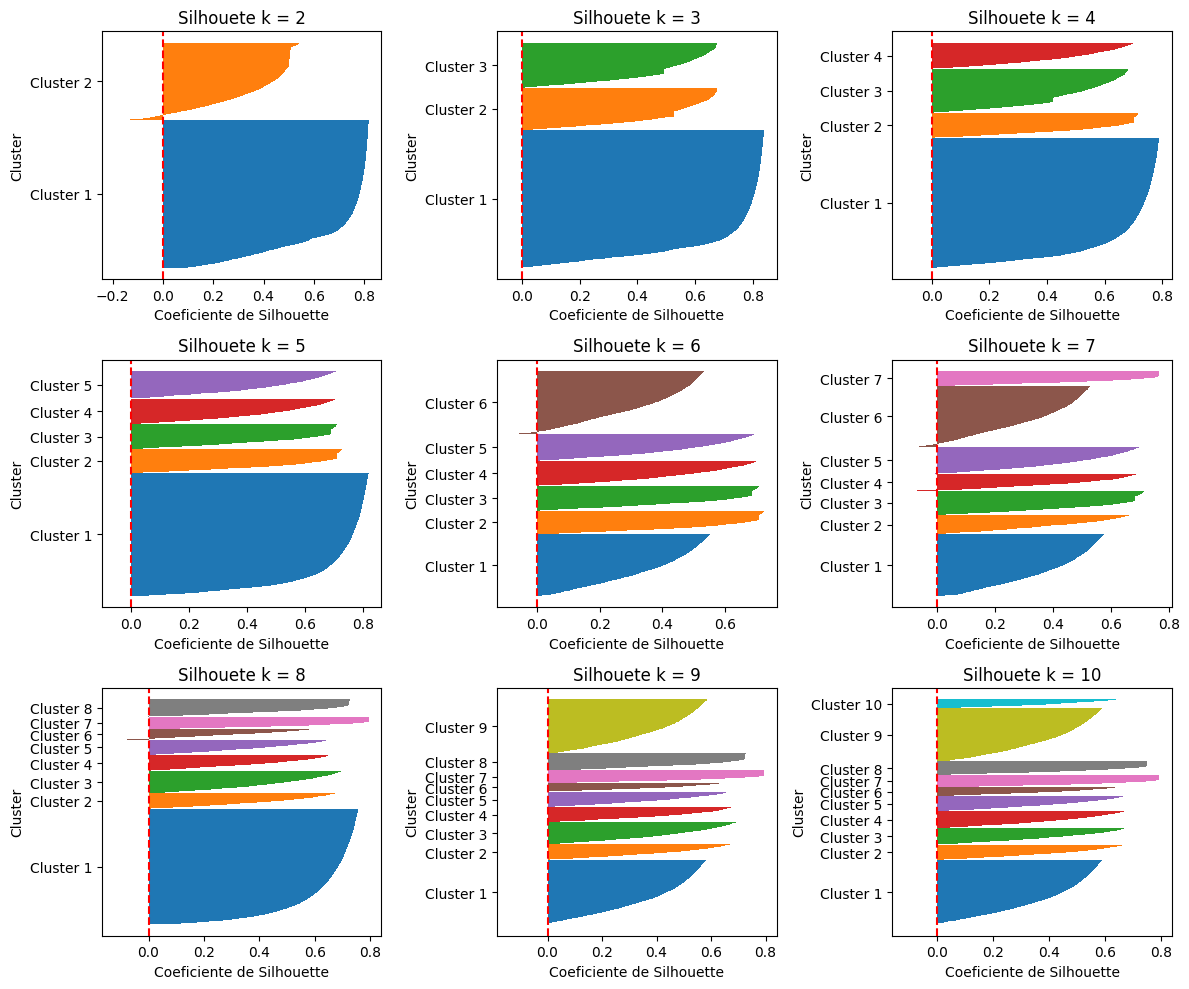

In [ ]:
# agora vamo usar os coeficientes de Silhouette pra confirmar esse número ideal de clusters

from sklearn.metrics import silhouette_samples

K_range = range (2, 11)  #-> vamo testar de 2 a 10 clusters
plt.figure (figsize = (12, 10))

for K in K_range:
  kmeans = KMeans (n_clusters = K, random_state = 42)
  kmeans.fit (features_pca)
  silhouette_vals = silhouette_samples (features_pca, kmeans.labels_)  #-> calcula o coeficiente de silhouette pra cada ponto

  y_ticks = []
  y_lower, y_upper = 0, 0
  plt.subplot (3, 3, K-1)  #-> subplot pra cada K

  for i, cluster in enumerate (np.unique (kmeans.labels_)):
    cluster_silhouette_vals = silhouette_vals [kmeans.labels_ == cluster]
    cluster_silhouette_vals.sort()

    y_upper = y_lower + len (cluster_silhouette_vals)
    plt.barh (range (y_lower, y_upper), cluster_silhouette_vals, height = 1.0, edgecolor = 'none')
    y_ticks.append ((y_lower + y_upper) / 2)
    y_lower = y_upper

  plt.axvline (x = 0, color = "red", linestyle = "--")  #-> esse "--" é a linha de zero no gráfico
  plt.title (f"Silhouete k = {K}")
  plt.xlabel ("Coeficiente de Silhouette")
  plt.ylabel ("Cluster")
  plt.yticks (y_ticks, [f"Cluster {i+1}" for i in range (len (np.unique (kmeans.labels_)))])

plt.tight_layout()
plt.show()

- o ideal é que as barras desse gráfico sejam positivas e bem separadas, o que indica uma boa definição dos clusters. os clusters muito pequenos ou com coeficiente próximos de zero ou negativos indicam que as amostras desses clusters podem estar mal atribuídos.
- esse modelo ideal pode ser representado por alguns dos gráficos, então vamo comparar as médias dos coeficientes, pra entender qual k proporciona o melhor equilíbrio entre clusters bem definidos e separados.

Média dos coeficientes de Silhouette pra k = 2: 0.5824
Média dos coeficientes de Silhouette pra k = 3: 0.6357
Média dos coeficientes de Silhouette pra k = 4: 0.5984
Média dos coeficientes de Silhouette pra k = 5: 0.6151
Média dos coeficientes de Silhouette pra k = 6: 0.4145
Média dos coeficientes de Silhouette pra k = 7: 0.4147
Média dos coeficientes de Silhouette pra k = 8: 0.5469
Média dos coeficientes de Silhouette pra k = 9: 0.4256
Média dos coeficientes de Silhouette pra k = 10: 0.4249


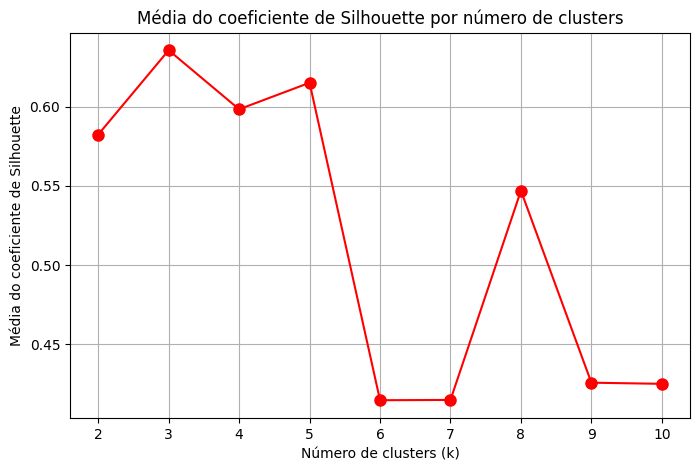

In [ ]:
# vamo calcular as médias dos coeficientes de Silhouette pra cada k

from sklearn.metrics import silhouette_score

silhouette_scores = []  #-> aqi a gente cria a lista pra armazenar as médias dos coeficientes
K = range (2, 11)  #-> vamo testar de 2 a 10 clusters

for k in K:  #-> aqi a gente aplica o loop
  kmeans = KMeans (n_clusters = k, random_state = 42)  #-> aqi a gente treina o modelo
  cluster_labels = kmeans.fit_predict (features_pca)
  silhouette_avg = silhouette_score (features_pca, cluster_labels)  #-> aqi a gente calcula o coeficiente médio
  silhouette_scores.append (silhouette_avg)

  print (f"Média dos coeficientes de Silhouette pra k = {k}: {silhouette_avg:.4f}")

# gráfico dos coeficientes - Silhouette
plt.figure (figsize = (8, 5))
plt.plot (K, silhouette_scores, 'ro-', markersize = 8)
plt.title ("Média do coeficiente de Silhouette por número de clusters")
plt.xlabel ("Número de clusters (k)")
plt.ylabel ("Média do coeficiente de Silhouette")
plt.grid (True)
plt.show()

- o método Elbow identificou o k = 5 como o ponto de equilíbrio entre homogeneidade dentro dos clusters e separação entre clusters, o que significa que esse é o número de clusters adequado pra capturar a estrutura dos dados;
- as médias de Silhouette são um pouco maiores pra k = 3, mas o valor da média pro k = 5 não é muito menor, o que indica que os clusters podem continuar bem definidos.
- vamo seguir com a recomendação do método Elbow, e depois a gente testa outros valores de k pra comparar os desempenhos.

In [ ]:
# vamo usar o método k-means++ pra garantir uma escolha inicial melhor dos centróides

kmeans = KMeans (n_clusters = 5, init = 'k-means++', n_init = 20, random_state = 42)  #-> o n_init indica que ele o algoritmo vai ser executado 20 vezes
kmeans.fit (features_pca)  #-> aqi a gente ajusta o modelo e retorna os rótulos

labels = kmeans.labels_  #-> aqi a gente obtém os rótulos de clusters atribuídos

In [ ]:
# vamo só conferir quantos dados foram atribuídos a cada cluster

unique, counts = np.unique (labels, return_counts = True)
print (dict (zip (unique, counts)))

{0: 1163, 1: 1150, 2: 5638, 3: 1088, 4: 1260}


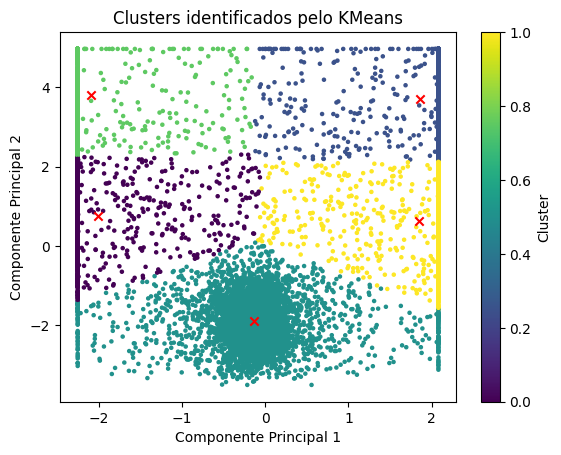

In [ ]:
# vamo visualizar esses dados

plt.scatter (features_pca [:, 0], features_pca [:, 1], c = labels, cmap = 'viridis', s = 5)
plt.scatter (kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', marker = 'x')
plt.colorbar (label = "Cluster")
plt.title ('Clusters identificados pelo KMeans')
plt.xlabel ('Componente Principal 1')
plt.ylabel ('Componente Principal 2')
plt.show()

In [ ]:
# pra gente avaliar o desempenho do modelo, vamo avaliar o desempenho do modelo com o coeficiente de Silhouette, a inércia e o índice Calinski-Harabasz

from sklearn.metrics import calinski_harabasz_score

silhouette_avg = silhouette_score (features_pca, kmeans.labels_)
print (f"Coeficiente de Silhouette: {silhouette_avg:.3f}")
print (f"Inércia final: {kmeans.inertia_:.3f}")
score = calinski_harabasz_score (features_pca, labels)
print ("Calinski-Harabasz score:", score)

Coeficiente de Silhouette: 0.615
Inércia final: 8634.867
Calinski-Harabasz score: 21019.123610601317


- o coeficiente de Silhouette varia de -1 a 1, sendo que 1 representa que os clusters são bem definidos, com os pontos de cada cluster bem próximo de seu centroide e bem afastados de outros clusters;
- o coeficiente do nosso modelo foi 0.615, que é um resultado moderado.
- não existe um valor absoluto ideal pra o índice de Calinski-Harabasz, mas valores maiores indicam clusters bem separados entre si e internamente coesos, então vamo guardar esse valor (21019.124) e comparar pra um possível outro valor de k.

In [ ]:
# outra forma de avaliar o modelo é calculando a homogeneidade e a completude

from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

y_true = activity_labels.flatten()
y_pred = labels

assert len(y_true) == len (y_pred), "y_true e y_pred devem ter o mesmo número de elementos."

homogeneidade = homogeneity_score (y_true, y_pred)
completude = completeness_score (y_true, y_pred)
v_measure = v_measure_score (y_true, y_pred)

print (f"Homogeneidade: {homogeneidade:.3f}")
print (f"Completude: {completude:.3f}")
print (f"V_measure: {v_measure:.3f}")

Homogeneidade: 0.329
Completude: 0.446
V_measure: 0.378


- a homogeneidade mede o grau em que cada cluster contém apenas membros de uma única classe verdadeira. um valor próximo de 1 indica que os clusters são homogêneos; nosso modelo conseguiu um valor de 0.329 pra essa métrica, o que significa que a classificação tem bastante espaço pra melhorar.
- a completude mede o grau em que todos os membros de uma classe verdadeira estão alocados no mesmo cluster. um valor próximo de 1 indica que as classes tão bem agrupadas dentro de clusters específicos. nosso valor de 0.446  tbm mostra que a classificação pode melhorar bastante.
- o v_measure é a relação entre essas duas métricas, então a gente pode usar ela como comparação com outros testes.

In [ ]:
# vamo testar uma matriz de contingência

matriz_cont = pd.crosstab (y_true, y_pred, rownames = ['Atividade real'], colnames = ['Cluster predito'])
print (matriz_cont)

Cluster predito    0    1     2    3    4
Atividade real                           
1                366  464    33  448  411
2                469  254    91  257  473
3                270  431    19  383  303
4                 20    0  1744    0   13
5                 27    0  1855    0   24
6                 11    1  1896    0   36


- dá pra ver que o modelo consegue captar relativamente bem as infos das atividades 4, 5 e 6. as classificações de 1, 2 e 3 acabam ficando bem confusas;
- os clusters tbm parecem bem heterogêneos, tendo dados de quase todas as classes em todos eles;
- vamo testar uma outra forma de processamento e analisar o impacto disso no modelo.

In [ ]:
# vamo iniciar novamente unificando os conjuntos de dados em um único DataFrame

features = np.vstack ([features_train, features_test])  #-> conjunto de features (X)
activity_labels = np.vstack ([activity_labels_train, activity_labels_test])

In [ ]:
# depois vamo dar uma tratada nos outliers, que a gente já sabe que tem nos nossos dados

features_win = features.copy()  #-> vamo criar uma cópia de novo pra garantir
for i in range (features_win.shape[1]):
  features_win [:, i] = winsorize (features [:, i], limits = (0.08, 0.08))  #-> esses limits vão delimitar os valores nos extremos ao percentil 8 e 92%

- como a gente já sabe que o k-means é bem sensível à escala, vamo normalizar os dados pras colunas ficarem na mesma faixa de valores;
- vamo usar o RobustScaler de novo pra normalizar esses dados com base na mediana e nos quartis, minimizando o impacto de valores extremos.

In [ ]:
# vamo refazer a normalização dos dados com RobustScaler

scaler = RobustScaler()
features_scaled = scaler.fit_transform (features_win)  #-> aqi vamo normalizar

Variância Explicada: [0.43221996 0.10585027]
Variância acumulada: 0.5380702361868889


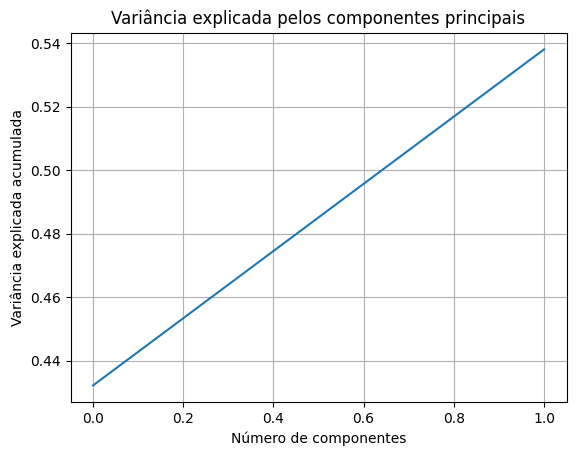

In [ ]:
# depois disso, vamo reduzir a dimensionalidade com PCA

pca = PCA (n_components = 2)  #-> aqi vamo reduzir as dimensões pra 2
features_pca = pca.fit_transform (features_scaled)

# vamo calcular tbm a variância pra cada componente:

var_explicada = pca.explained_variance_ratio_
print (f"Variância Explicada: {var_explicada}")
print (f"Variância acumulada: {var_explicada.sum()}")

plt.plot (np.cumsum (var_explicada))
plt.xlabel ("Número de componentes")
plt.ylabel ("Variância explicada acumulada")
plt.title ("Variância explicada pelos componentes principais")
plt.grid (True)
plt.show()

- a variância explicada já subiu pra quase 54%, o que mostra que menos informações foram perdidas na redução de dimensionalidade.

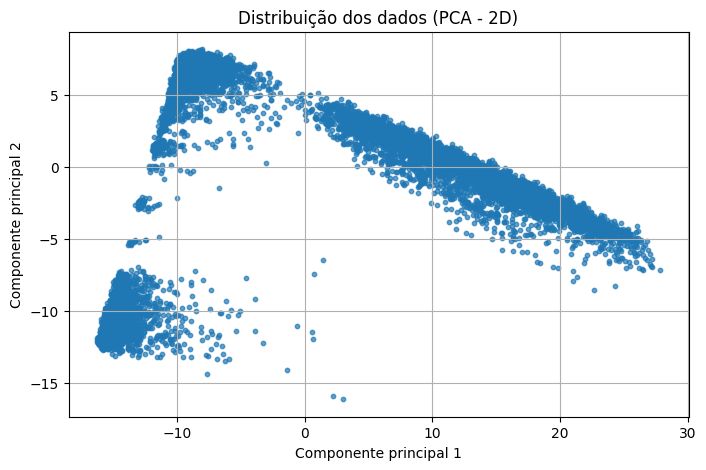

In [ ]:
# vamo fazer um gráfico de dispersão pra visualizar a distribuição geral dos dados:

plt.figure (figsize = (8, 5))
plt.scatter (features_pca [:, 0], features_pca [:, 1], s = 10, alpha = 0.7)
plt.title ("Distribuição dos dados (PCA - 2D)")
plt.xlabel ("Componente principal 1")
plt.ylabel ("Componente principal 2")
plt.grid (True)
plt.show()

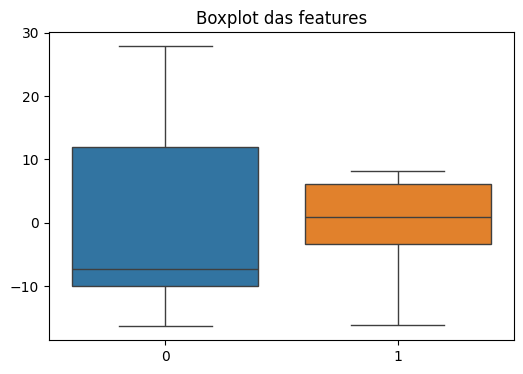

In [ ]:
# vamo confirmar o tratamento dos outliers nos novos componentes:

plt.figure (figsize = (6, 4))
sns.boxplot (data = features_pca)
plt.title ("Boxplot das features")
plt.show()

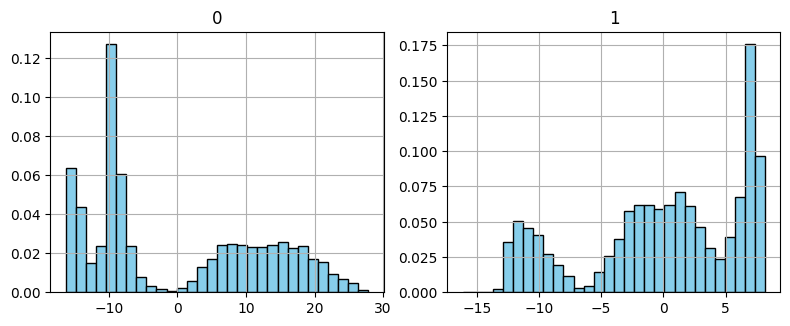

In [ ]:
# vamo gerar histogramas tbm, pra analisar a distribuição de cada variável

features_pca_df = pd.DataFrame (features_pca)
features_pca_df.hist (bins = 30, density = True, figsize = (20, 45), layout = (15, 5), color = 'skyblue', edgecolor = 'black')  #-> aqi cria o histograma
plt.title ("Distribuição das variáveis")
plt.tight_layout()
plt.show()

- a distribuição tbm parece ser mais normalizada do que antes.

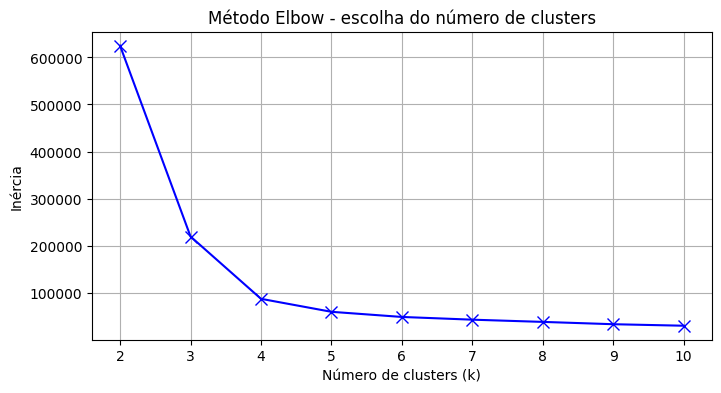

In [ ]:
# antes de treinar o modelo, vamo re-escolher o número de clusters
# vamo usar o método Elbow pra achar o cotovelo

from sklearn.cluster import KMeans

inertia = []
K = range (2, 11)  #-> vamo testar de 2 a 10 clusters

for k in K:
  kmeans = KMeans (n_clusters = k, random_state = 42)
  kmeans.fit(features_pca)
  inertia.append (kmeans.inertia_)

plt.show()

# gráfico da inércia - Elbow
plt.figure (figsize = (8, 4))
plt.plot (K, inertia, 'bx-', markersize = 8)
plt.title ("Método Elbow - escolha do número de clusters")
plt.xlabel ("Número de clusters (k)")
plt.ylabel ("Inércia")
plt.grid (True)
plt.show()

- vamo conferir matematicamente qual o cotovelo desse gráfico, pra ajudar a definir o k ideal.

In [ ]:
# vamo ver, matematicamente, qual o número ideal de clusters pelo método Elbow

wcss = []  #-> o parâmetro wcss representa a lista de inércias
K = range (2, 21)
for k in K:
  kmeans = KMeans (n_clusters = k, random_state = 42)
  kmeans.fit (features_pca)
  wcss.append (kmeans.inertia_)

def melhor_n_cluster (wcss):
    x1, y1 = 2, wcss[0]  #-> aqi a gente define os pontos iniciais e finais, indo de clusters com 2 grupos, até clusters com 20 grupos
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []  #-> as distâncias vão ser armazenadas aqi, e o índice de maior valor corresponde ao ponto de cotovelo
    for i in range(len(wcss)):
        x0 = i+2  #-> a gente ajusta esse índice em +2 pra refletir que os valores começam em 2 e não em 0
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)

    return distances.index(max(distances)) + 2

melhor_k = melhor_n_cluster (wcss)
print (f"O número ideal de clusters é: {melhor_k}")

O número ideal de clusters é: 4


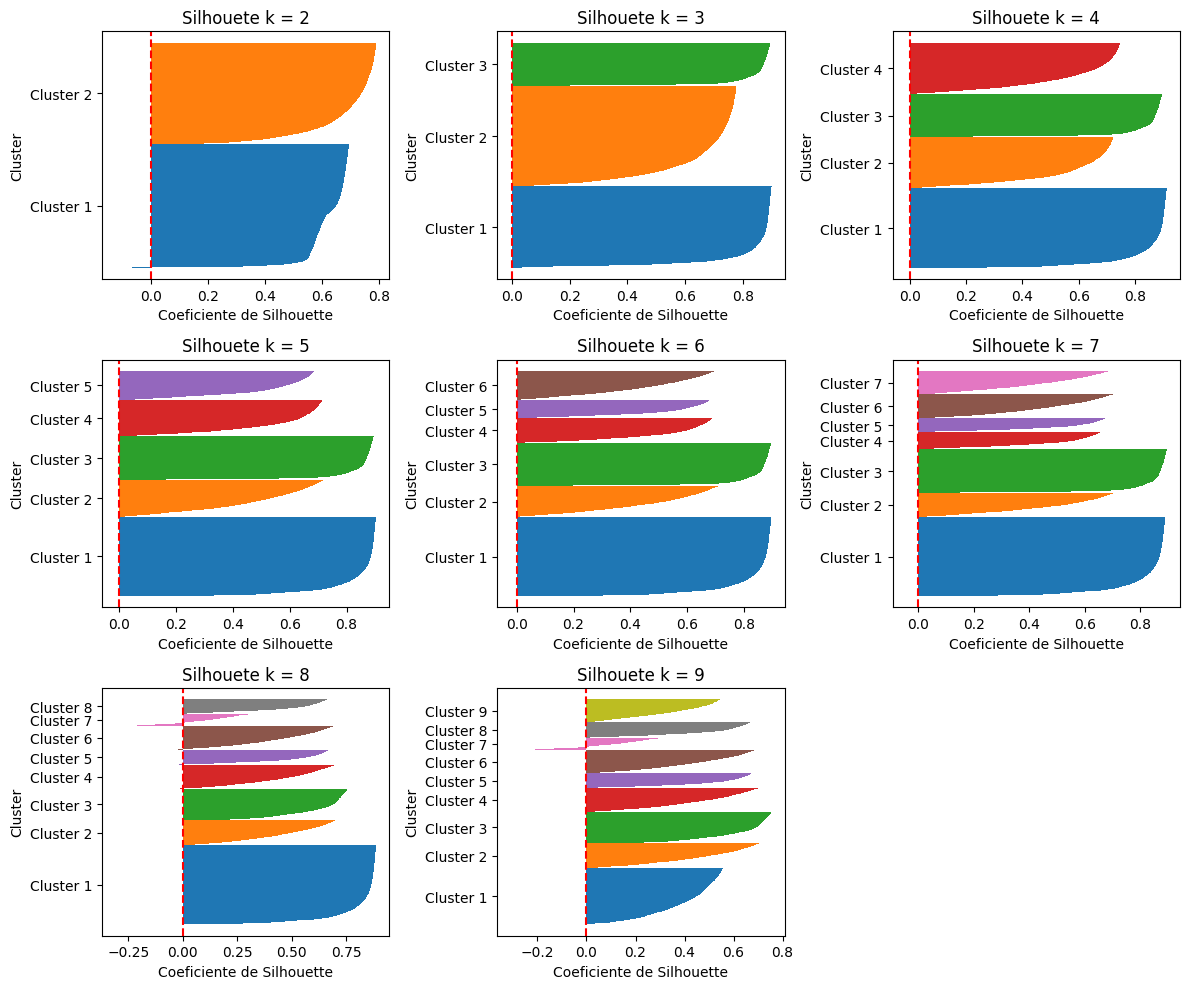

In [ ]:
# agora vamo usar os coeficientes de Silhouette pra confirmar de novo esse número ideal de clusters

K_range = range (2, 10)  #-> vamo testar de 4 a 9 clusters
plt.figure (figsize = (12, 10))

for K in K_range:
  kmeans = KMeans (n_clusters = K, random_state = 42)
  kmeans.fit (features_pca)
  silhouette_vals = silhouette_samples (features_pca, kmeans.labels_)  #-> calcula o coeficiente de silhouette pra cada ponto

  y_ticks = []
  y_lower, y_upper = 0, 0
  plt.subplot (3, 3, K-1)  #-> subplot pra cada K

  for i, cluster in enumerate (np.unique (kmeans.labels_)):
    cluster_silhouette_vals = silhouette_vals [kmeans.labels_ == cluster]
    cluster_silhouette_vals.sort()

    y_upper = y_lower + len (cluster_silhouette_vals)
    plt.barh (range (y_lower, y_upper), cluster_silhouette_vals, height = 1.0, edgecolor = 'none')
    y_ticks.append ((y_lower + y_upper) / 2)
    y_lower = y_upper

  plt.axvline (x = 0, color = "red", linestyle = "--")  #-> esse "--" é a linha de zero no gráfico
  plt.title (f"Silhouete k = {K}")
  plt.xlabel ("Coeficiente de Silhouette")
  plt.ylabel ("Cluster")
  plt.yticks (y_ticks, [f"Cluster {i+1}" for i in range (len (np.unique (kmeans.labels_)))])

plt.tight_layout()
plt.show()

- vamo refazer as médias dos coeficientes pra comparar e entender qual k proporciona o melhor equilíbrio entre clusters bem definidos e separados.

Média dos coeficientes de Silhouette pra k = 2: 0.6533
Média dos coeficientes de Silhouette pra k = 3: 0.7533
Média dos coeficientes de Silhouette pra k = 4: 0.7226
Média dos coeficientes de Silhouette pra k = 5: 0.6938
Média dos coeficientes de Silhouette pra k = 6: 0.6734
Média dos coeficientes de Silhouette pra k = 7: 0.6608
Média dos coeficientes de Silhouette pra k = 8: 0.5900
Média dos coeficientes de Silhouette pra k = 9: 0.4402
Média dos coeficientes de Silhouette pra k = 10: 0.4325


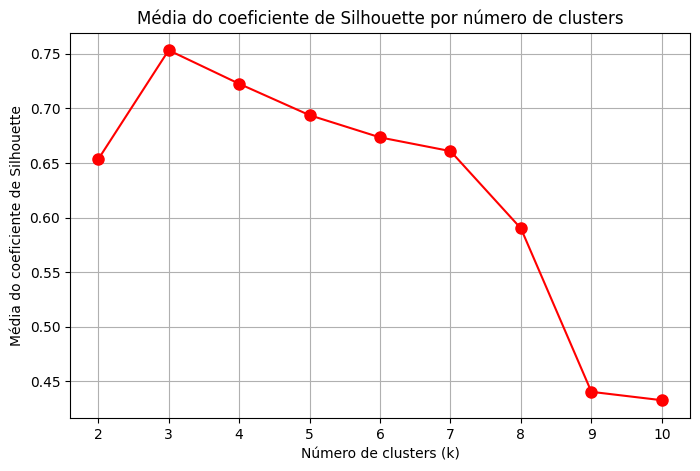

In [ ]:
# vamo calcular as médias dos coeficientes de Silhouette pra cada k

silhouette_scores = []  #-> aqi a gente cria a lista pra armazenar as médias dos coeficientes
K = range (2, 11)  #-> vamo testar de 5 a 10 clusters

for k in K:  #-> aqi a gente aplica o loop
  kmeans = KMeans (n_clusters = k, random_state = 42)  #-> aqi a gente treina o modelo
  cluster_labels = kmeans.fit_predict (features_pca)
  silhouette_avg = silhouette_score (features_pca, cluster_labels)  #-> aqi a gente calcula o coeficiente médio
  silhouette_scores.append (silhouette_avg)

  print (f"Média dos coeficientes de Silhouette pra k = {k}: {silhouette_avg:.4f}")

# gráfico dos coeficientes - Silhouette
plt.figure (figsize = (8, 5))
plt.plot (K, silhouette_scores, 'ro-', markersize = 8)
plt.title ("Média do coeficiente de Silhouette por número de clusters")
plt.xlabel ("Número de clusters (k)")
plt.ylabel ("Média do coeficiente de Silhouette")
plt.grid (True)
plt.show()

- o método Elbow identificou o k = 4 como o número de clusters adequado pra capturar a estrutura dos dados;
- as médias de Silhouette são um pouco maiores pra k = 3, mas o valor da média pro k = 4 não é muito menor, o que indica que os clusters podem continuar bem definidos.
- vamo seguir com a recomendação do método Elbow, e depois a gente testa outros valores de k pra comparar os desempenhos.

In [ ]:
# vamo usar o método k-means++ pra garantir uma escolha inicial melhor dos centróides

kmeans = KMeans (n_clusters = 4, init = 'k-means++', n_init = 20, random_state = 42)  #-> o n_init indica que ele o algoritmo vai ser executado 20 vezes
clusters = kmeans.fit_predict (features_pca)  #-> aqi a gente ajusta o modelo e retorna os rótulos

In [ ]:
# vamo conferir de novo quantos dados foram atribuídos a cada cluster

unique, counts = np.unique (clusters, return_counts = True)
print (dict (zip (unique, counts)))

{0: 2370, 1: 3632, 2: 1992, 3: 2305}


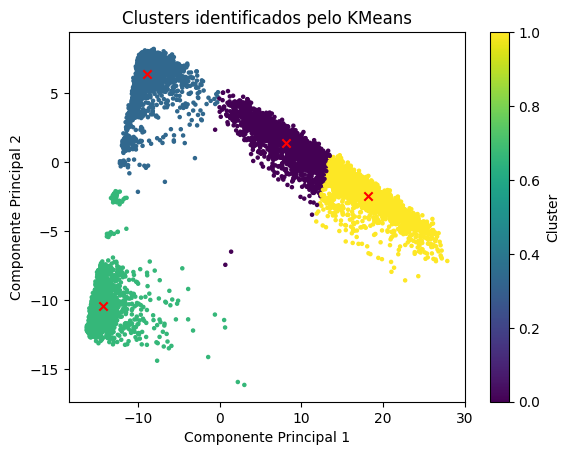

In [ ]:
# vamo visualizar esses dados

plt.scatter (features_pca [:, 0], features_pca [:, 1], c = clusters, cmap = 'viridis', s = 5)
plt.scatter (kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', marker = 'x')
plt.colorbar (label = "Cluster")
plt.title ('Clusters identificados pelo KMeans')
plt.xlabel ('Componente Principal 1')
plt.ylabel ('Componente Principal 2')
plt.show()

In [ ]:
# pra gente avaliar o desempenho do modelo, vamo avaliar o desempenho do modelo com o coeficiente de Silhouette, a inércia e o índice Calinski-Harabasz

from sklearn.metrics import calinski_harabasz_score

silhouette_avg = silhouette_score (features_pca, kmeans.labels_)
print (f"Coeficiente de Silhouette: {silhouette_avg:.3f}")
print (f"Inércia final: {kmeans.inertia_:.3f}")
score = calinski_harabasz_score (features_pca, clusters)
print ("Calinski-Harabasz score:", score)

Coeficiente de Silhouette: 0.722
Inércia final: 87436.317
Calinski-Harabasz score: 78099.30445305367


- o coeficiente de silhouette do nosso modelo aumentou de 0.615 pra 0.722, o que é bem melhor.
- o índice de Calinski-Harabasz tbm aumentou de 21019.124 pra 78099.305, o que quer dizer que os clusters estão mais bem separados agora do que antes.

In [ ]:
# outra forma de avaliar o modelo é calculando a homogeneidade e a completude

from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

y_true = activity_labels.flatten()
y_pred = clusters

assert len(y_true) == len (y_pred), "y_true e y_pred devem ter o mesmo número de elementos."

homogeneidade = homogeneity_score (y_true, y_pred)
completude = completeness_score (y_true, y_pred)
v_measure = v_measure_score (y_true, y_pred)

print (f"Homogeneidade: {homogeneidade:.3f}")
print (f"Completude: {completude:.3f}")
print (f"V_measure: {v_measure:.3f}")

Homogeneidade: 0.592
Completude: 0.778
V_measure: 0.672


- a homogeneidade passou de 0.329 pra 0.592
- a completude passou de 0.449 pra 0.778
- e a relação entre as duas passou de 0.378 pra 0.672
- esses valores mostram que a separação dos clusters já foi muito mais eficiente do que no modelo anterior;
- apesar de serem bons valores, ainda tem espaço pra melhorar.

In [ ]:
# vamo testar a matriz de contingência tbm

matriz_cont = pd.crosstab (y_true, y_pred, rownames = ['Atividade real'], colnames = ['Cluster predito'])
print (matriz_cont)

Cluster predito     0     1     2     3
Atividade real                         
1                 890     0     0   832
2                1151     2     0   391
3                 324     0     0  1082
4                   2  1725    50     0
5                   1  1905     0     0
6                   2     0  1942     0


- a classificação já se deu de forma bem mais acertada agora.
- o modelo acertou a classificação de quase todos os dados nas atividades 6 e 5, errou poucos na atividade 4. de forma geral, as classificações de 1, 2 e 3 continuam ficando confusas.
- isso pode ser acontecer pq as atividades podem ter padrões similares nos dados, dificultando a separação pelo modelo de clustering.
- (vale lembrar que as classes são: 1. caminhando | 2. subindo escadas | 3. descendo escadas | 4. sentado | 5. em pé | 6. deitado)
- a gente tbm sabe que o kmeans é sensível a clusters de formato não esférico, então talvez um outro modelo (como o DBSCAN, por exemplo) pode identificar padrões mais complexos.
- como o modelo caracterizou bem as classes 4, 5 e 6, talvez valha a pena, como complemento de estudo, tbm treinar o modelo só com  essas classes pra tentar capturar nuances que o modelo, de um modo geral, não consegue (mas isso, de qqr maneira, vai limitar a capacidade do modelo de encontrar padrões em dados mais complexos e misturados)
- vamo verificar a distribuição das classes pra analisar se os dados tão balanceados ou não.

In [ ]:
# vamo verificar a distribuição das classes

from collections import Counter

activity_labels_1d = activity_labels.ravel()
distribuicao_classes = Counter (activity_labels_1d)
total_amostras = sum (distribuicao_classes.values())
proporcao_classes = {k: v / total_amostras for k, v in distribuicao_classes.items()}

print ("Distribuição das classes:", distribuicao_classes)
print ("Proporção das classes:", proporcao_classes)

Distribuição das classes: Counter({6: 1944, 5: 1906, 4: 1777, 1: 1722, 2: 1544, 3: 1406})
Proporção das classes: {5: 0.18506651131177784, 4: 0.17254102340033012, 6: 0.1887561899213516, 1: 0.16720069909699972, 3: 0.13651810855422858, 2: 0.14991746771531217}


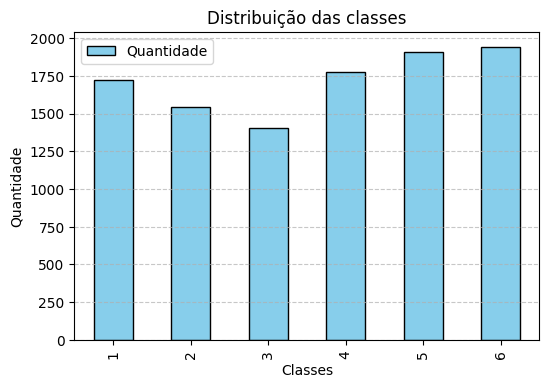

In [ ]:
# vamo visualizar a distribuição em um gráfico

distribuicao_classes_df = pd.DataFrame.from_dict (distribuicao_classes, orient = 'index', columns = ['Quantidade'])
distribuicao_classes_df = distribuicao_classes_df.sort_index()

distribuicao_classes_df.plot (kind = "bar", figsize = (6, 4), color = 'skyblue', edgecolor = 'black')  #-> aqi cria o histograma
plt.title ("Distribuição das classes")
plt.xlabel ("Classes")
plt.ylabel ("Quantidade")
plt.grid (axis = "y", linestyle = "--", alpha = 0.7)
plt.show()

- as classes não estão desbalanceadas;
- mas as classes que tem mais dados, no fim das contas, são as classes que foram melhor caracterizadas.
- aumentar o banco de dados talvez tbm pudesse melhorar o desempenho do modelo.

In [ ]:
# vamo iniciar novamente unificando os conjuntos de dados em um único DataFrame

features = np.vstack ([features_train, features_test])  #-> conjunto de features (X)
activity_labels = np.vstack ([activity_labels_train, activity_labels_test])

In [ ]:
# depois vamo dar uma tratada nos outliers, que a gente já sabe que tem nos nossos dados

from scipy.stats.mstats import winsorize

features_win = features.copy()  #-> vamo criar uma cópia de novo pra garantir
for i in range (features_win.shape[1]):
  features_win [:, i] = winsorize (features [:, i], limits = (0.05, 0.05))  #-> esses limits vão delimitar os valores nos extremos ao percentil 8 e 92%

In [ ]:
# vamo refazer a normalização dos dados com StandardScaler

from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
features_scaled = scaler.fit_transform (features_win)  #-> aqi vamo normalizar

In [ ]:
pip install umap-learn  #-> vamo instalar o umap, pq não rodou sozinho

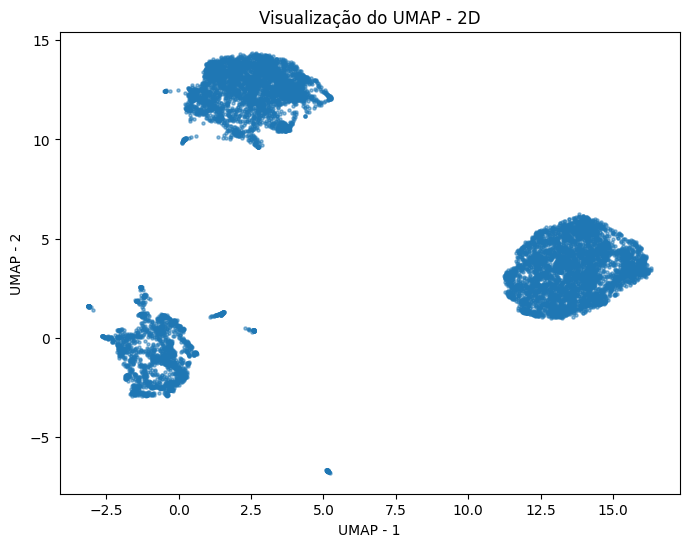

In [ ]:
# agora que a gente fez uma limpa nas variáveis que poderiam atrapalhar o desempenho do modelo, vamo reduzir a dimensionalidade usando UMAP

import umap.umap_ as umap

umap = umap.UMAP (n_neighbors = 15, n_components = 2)  #-> vamo usar um n_neighbors baixo e depois testar com valores diferentes pra analisar o impacto no desempenho do modelo
features_umap = umap.fit_transform (features_scaled)

plt.figure (figsize = (8, 6))
plt.scatter (features_umap [:, 0], features_umap [:, 1], alpha = 0.5, s = 5)
plt.title ('Visualização do UMAP - 2D')
plt.xlabel ('UMAP - 1')
plt.ylabel ('UMAP - 2')
plt.show()

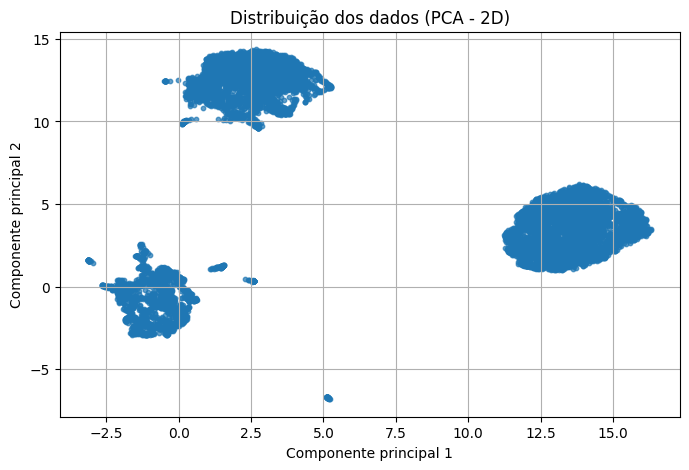

In [ ]:
# vamo fazer um gráfico de dispersão pra visualizar a distribuição geral dos dados:

plt.figure (figsize = (8, 5))
plt.scatter (features_umap [:, 0], features_umap [:, 1], s = 10, alpha = 0.7)
plt.title ("Distribuição dos dados (PCA - 2D)")
plt.xlabel ("Componente principal 1")
plt.ylabel ("Componente principal 2")
plt.grid (True)
plt.show()

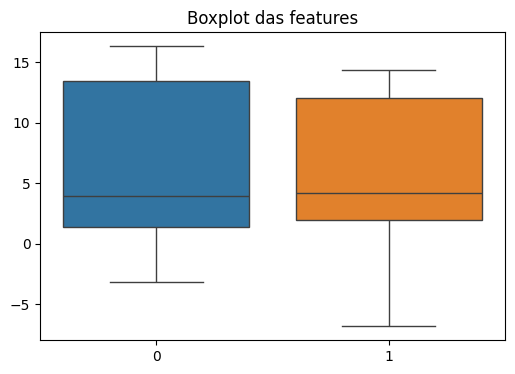

In [ ]:
# vamo confirmar o tratamento dos outliers nos novos componentes:

plt.figure (figsize = (6, 4))
sns.boxplot (data = features_umap)
plt.title ("Boxplot das features")
plt.show()

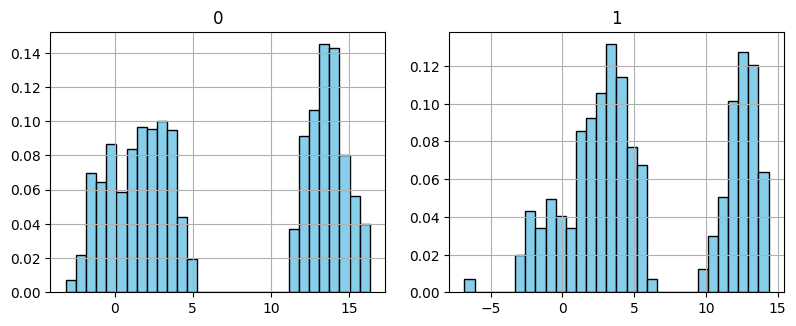

In [ ]:
# vamo gerar histogramas tbm, pra analisar a distribuição de cada variável

features_umap_df = pd.DataFrame (features_umap)
features_umap_df.hist (bins = 30, density = True, figsize = (20, 45), layout = (15, 5), color = 'skyblue', edgecolor = 'black')  #-> aqi cria o histograma
plt.title ("Distribuição das variáveis")
plt.tight_layout()
plt.show()

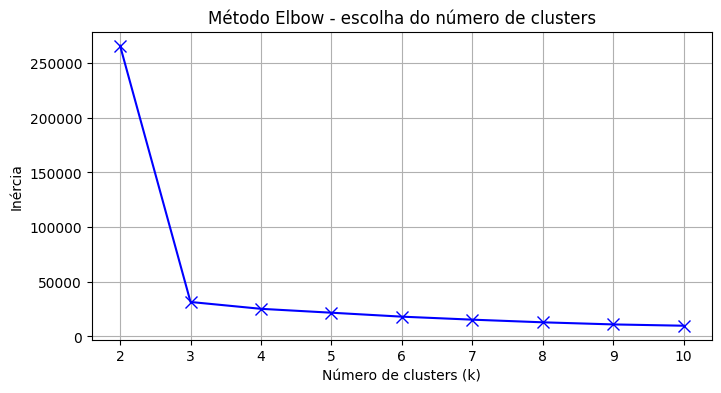

In [ ]:
# antes de treinar o modelo, vamo re-escolher o número de clusters
# vamo usar o método Elbow pra achar o cotovelo

from sklearn.cluster import KMeans

inertia = []
K = range (2, 11)  #-> vamo testar de 2 a 10 clusters

for k in K:
  kmeans = KMeans (n_clusters = k, random_state = 42)
  kmeans.fit(features_umap)
  inertia.append (kmeans.inertia_)

plt.show()

# gráfico da inércia - Elbow
plt.figure (figsize = (8, 4))
plt.plot (K, inertia, 'bx-', markersize = 8)
plt.title ("Método Elbow - escolha do número de clusters")
plt.xlabel ("Número de clusters (k)")
plt.ylabel ("Inércia")
plt.grid (True)
plt.show()

In [ ]:
# vamo ver, matematicamente, qual o número ideal de clusters pelo método Elbow

from math import sqrt

wcss = []  #-> o parâmetro wcss representa a lista de inércias
K = range (2, 21)
for k in K:
  kmeans = KMeans (n_clusters = k, random_state = 42)
  kmeans.fit (features_umap)
  wcss.append (kmeans.inertia_)

def melhor_n_cluster (wcss):
    x1, y1 = 2, wcss[0]  #-> aqi a gente define os pontos iniciais e finais, indo de clusters com 2 grupos, até clusters com 20 grupos
    x2, y2 = 20, wcss[len(wcss)-1]

    distances = []  #-> as distâncias vão ser armazenadas aqi, e o índice de maior valor corresponde ao ponto de cotovelo
    for i in range(len(wcss)):
        x0 = i+2  #-> a gente ajusta esse índice em +2 pra refletir que os valores começam em 2 e não em 0
        y0 = wcss[i]
        numerator = abs((y2-y1)*x0 - (x2-x1)*y0 + x2*y1 - y2*x1)
        denominator = sqrt((y2 - y1)**2 + (x2 - x1)**2)
        distances.append(numerator/denominator)

    return distances.index(max(distances)) + 2

melhor_k = melhor_n_cluster (wcss)
print (f"O número ideal de clusters é: {melhor_k}")

O número ideal de clusters é: 3


Média dos coeficientes de Silhouette pra k = 2: 0.6577
Média dos coeficientes de Silhouette pra k = 3: 0.8426
Média dos coeficientes de Silhouette pra k = 4: 0.6368
Média dos coeficientes de Silhouette pra k = 5: 0.6264
Média dos coeficientes de Silhouette pra k = 6: 0.4564
Média dos coeficientes de Silhouette pra k = 7: 0.4597
Média dos coeficientes de Silhouette pra k = 8: 0.3987
Média dos coeficientes de Silhouette pra k = 9: 0.4045
Média dos coeficientes de Silhouette pra k = 10: 0.3950


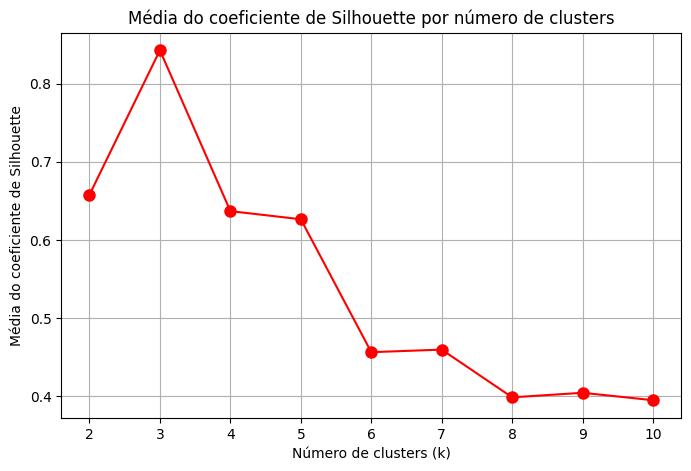

In [ ]:
# vamo calcular as médias dos coeficientes de Silhouette pra cada k

from sklearn.metrics import silhouette_score

silhouette_scores = []  #-> aqi a gente cria a lista pra armazenar as médias dos coeficientes
K = range (2, 11)  #-> vamo testar de 5 a 10 clusters

for k in K:  #-> aqi a gente aplica o loop
  kmeans = KMeans (n_clusters = k, random_state = 42)  #-> aqi a gente treina o modelo
  cluster_labels = kmeans.fit_predict (features_umap)
  silhouette_avg = silhouette_score (features_umap, cluster_labels)  #-> aqi a gente calcula o coeficiente médio
  silhouette_scores.append (silhouette_avg)

  print (f"Média dos coeficientes de Silhouette pra k = {k}: {silhouette_avg:.4f}")

# gráfico dos coeficientes - Silhouette
plt.figure (figsize = (8, 5))
plt.plot (K, silhouette_scores, 'ro-', markersize = 8)
plt.title ("Média do coeficiente de Silhouette por número de clusters")
plt.xlabel ("Número de clusters (k)")
plt.ylabel ("Média do coeficiente de Silhouette")
plt.grid (True)
plt.show()

In [ ]:
# vamo usar o método k-means++ pra garantir uma escolha inicial melhor dos centróides

kmeans = KMeans (n_clusters = 3, init = 'k-means++', n_init = 20, random_state = 42)  #-> o n_init indica que ele o algoritmo vai ser executado 20 vezes
clusters = kmeans.fit_predict (features_umap)  #-> aqi a gente ajusta o modelo e retorna os rótulos

In [ ]:
# pra gente avaliar o desempenho do modelo, vamo avaliar o desempenho do modelo com o coeficiente de Silhouette, a inércia e o índice Calinski-Harabasz

from sklearn.metrics import calinski_harabasz_score

silhouette_avg = silhouette_score (features_umap, kmeans.labels_)
print (f"Coeficiente de Silhouette: {silhouette_avg:.3f}")
print (f"Inércia final: {kmeans.inertia_:.3f}")
score = calinski_harabasz_score (features_umap, clusters)
print ("Calinski-Harabasz score:", score)

Coeficiente de Silhouette: 0.843
Inércia final: 31533.170
Calinski-Harabasz score: 108832.87375610224


In [ ]:
# outra forma de avaliar o modelo é calculando a homogeneidade e a completude

from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score

y_true = activity_labels.flatten()
y_pred = clusters

assert len(y_true) == len (y_pred), "y_true e y_pred devem ter o mesmo número de elementos."

homogeneidade = homogeneity_score (y_true, y_pred)
completude = completeness_score (y_true, y_pred)
v_measure = v_measure_score (y_true, y_pred)

print (f"Homogeneidade: {homogeneidade:.3f}")
print (f"Completude: {completude:.3f}")
print (f"V_measure: {v_measure:.3f}")

Homogeneidade: 0.583
Completude: 0.999
V_measure: 0.736


In [ ]:
# vamo testar a matriz de contingência tbm

matriz_cont = pd.crosstab (y_true, y_pred, rownames = ['Atividade real'], colnames = ['Cluster predito'])
print (matriz_cont)

Cluster predito     0     1     2
Atividade real                   
1                   0  1722     0
2                   0  1544     0
3                   0  1406     0
4                1776     1     0
5                1906     0     0
6                   0     0  1944
